In [2]:

# Task 1 Cavity Transmission
# cavity transmission
p1=1 # input power
r=0.9
t=0.1
# solving the coupled equations
a1=(p1)**0.5
a3=(a1-1j*r*a1)/(r+1j*t)
a4=r*a1+1j*t*a3
a2=r*a3+1j*t*a4
ptransmitted=abs(a2)**2 #power transmitted through cavity
print("transmitted power=",ptransmitted)





transmitted power= 1.578732926829268


In [1]:
# Task 2: Resonances
import math
# Constants
c = 3e8  # Speed of light in m/s

# Function to calculate the change in frequency based on the change in length
def calc_freq_change(delta_L, n, L):
    FSR = c / (2 * L)
    freq_change = delta_L * FSR / n
    return freq_change

# Function to calculate the change in length based on the change in frequency
def calc_length_change(delta_f, n, L):
    FSR = c / (2 * L)
    length_change = delta_f * n / FSR
    return length_change

#  for example 
n = 2  # Number of wavelengths in the cavity
L = 5  # Length of the cavity in meters

# Change in length of the cavity
delta_L = 1.0  # Change in length in meters

# Calculate the change in frequency based on the change in length
freq_change = calc_freq_change(delta_L, n, L)

# Print the result
print("Change in Frequency:", freq_change, "Hz")

# Change in frequency of the cavity
delta_f = 1e9  # Change in frequency in Hz

# Calculate the change in length based on the change in frequency
length_change = calc_length_change(delta_f, n, L)

# Print the result
print("Change in Length:", length_change, "m")

Change in Frequency: 15000000.0 Hz
Change in Length: 66.66666666666667 m


In [2]:
 # condition on F and L for resonance in a cavity
L = 3  # Length of the cavity in meters
m = 1  # Resonance mode order
P_in = 10  # Input power in Watts
r = 0.9  # Reflectivity of the mirrors
F = 10  # Finesse of the cavity

# Calculate the resonance wavelength
wavelength = 2 * L / m

# Calculate the maximum power transmitted through the cavity
P_max = P_in * ((1 - r) / (1 - r * F))**2

# Print the result
print("Resonance Wavelength:", wavelength, "m")
print("Maximum Transmitted Power:", P_max, "W")

Resonance Wavelength: 6.0 m
Maximum Transmitted Power: 0.0015624999999999992 W


In [3]:
#FSR of the cavity, in terms of the frequency
c = 3e8  # Speed of light in m/s

# Function to calculate the FSR in terms of frequency
def calculate_fsr(frequency, L):
    FSR = c / (2 * L)
    freq_fsr = frequency / FSR
    return freq_fsr

# Example usage
frequency = 1e9  # Frequency in Hz
L = 3  # Length of the cavity in meters

# Calculate the FSR in terms of frequency
freq_fsr = calculate_fsr(frequency, L)

# Print the result
print("FSR in Terms of Frequency:", freq_fsr)

FSR in Terms of Frequency: 20.0


In [4]:
#Task 3: write the base code for the optical model
import finesse
basecode = """
l L0 P=1#Define a 1 W laser
s s0 L0.p1 m1.p1 L=0.1  #space of 0.1 m (10 cm) from laser to mirror M1
#the cavity:
mirror m1 R=0.85 t=0.15
s CAV m1.p2 m2.p1 L=3000
mirror m2 R=0.85  T=0.15
"""

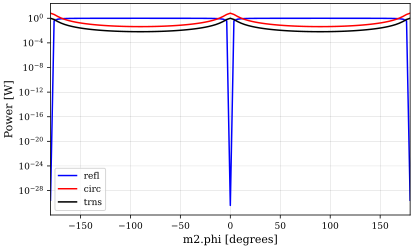

In [5]:
# Task 4:add the three photodiodes & simulate the response of the cavity as the tuning of M2 is varied.
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    # Add a Laser named L0 with a power of 1 W.
    l L0 P=1 f=0

    # Space attaching L0 - m1 with length of 10 cm .
    s s0 L0.p1 m1.p1 L=0.1

    # Input mirror of cavity.
    m m1 R=0.85 T=0.15

    # Intra-cavity space with length of 3000 m.
    s CAV m1.p2 m2.p1 L=3000

    # End mirror of cavity.
    m m2 R=0.85  T=0.15

    # Power detectors on reflection, circulation and transmission.
    pd refl m1.p1.o
    pd circ m2.p1.i
    pd trns m2.p2.o

    # Scan over the detuning DOF of m2 from -180 deg to +180 deg with 100 points.
    xaxis(m2.phi, lin, -180, 180, 100)
    """
)
out = kat.run()
out.plot(logy=True);

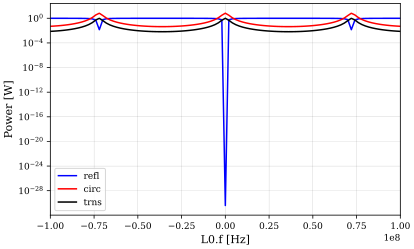

In [6]:
#task 3  simulate the response of the cavity as the laser frequency is varied


import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    # Add a Laser named L0 with a power of 1 W.
    l L0 P=1

    # Space attaching L0 - m1 with length of 10 cm .
    s s0 L0.p1 m1.p1 L=0.1

    # Input mirror  cavity.
    m m1 R=0.85 T=0.15

    # Intra-cavity space with length of 3000 m.
    s CAV m1.p2 m2.p1 L=3000

    # End mirror  cavity.
    m m2 R=0.85  T=0.15

    # Power detectors on reflection, circulation and transmission.
    pd refl m1.p1.o
    pd circ m2.p1.i
    pd trns m2.p2.o

    # Scan over  from -180 deg to +180 deg with 100 points.
    xaxis(L0.f, lin, -100M, 100M, 100)
    """
)
out = kat.run()
out.plot(logy=True);